<a href="https://colab.research.google.com/github/Benjamilior/proyecy_miner_02/blob/main/Proyecto_Mineria_Programa_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datos requeridos por el sistema( rellenar por el usuario)

In [17]:
id_cancion = input(str("Ingresa el ID de tu cancion"))
#Ejemplo de ID 2Vc6NJ9PW9gD9q343XFRKx,0KRKqIJPX6LT9v1ZQGbfn7, 5mPUo1HP5K4H6hepYHqbZx,  4owRIrDAJPqNWGf2SGC3H8


Ingresa el ID de tu cancion0XfQbq7DaMOmVXgQ71eA6E


Acá se pide ingresar el token de acceso de la Api de Spotify ( este se consigue en el siguiente link = https://developer.spotify.com/console/get-audio-features-several-tracks/?ids=). Dar Click en Get Token y elegir la siguiente casilla = "user-read-recently-played". Una ves generado el token, colocar acá

In [18]:
tokendeacceso = input(str("Por favor ingresar el token"))

Por favor ingresar el tokenBQBIAwvcJAPNi1Uoa8QSJOb_6m7Gg_IUiLN3tHSw42E05pxKG-dcRCsndlyAlDmGUuX1dvw54UfQWYmBUXEimL_H6eqm1nc71Kmjp2rJd5RGU6eKSXtKKyAQxbRTLsxZYe04Pp43JDwIIC0eTp1hpQ


#extraccion Info CANCION

In [19]:
# !pip install opencv-contrib-python

In [20]:
# !pip install opencv-python

In [21]:
# !pip install --user <package>

In [22]:
# !pip install requests

In [23]:
import base64
import requests
import datetime
from urllib.parse import urlencode
import json


In [24]:
client_id = '7b99efc27dcd47cbb18d6b9929ebdcda'
client_secret = '64b765c9c7de4bf4ac9829b77e61ea54'

In [25]:
class SpotifyAPI(object):
    access_token = None
    access_token_expires = datetime.datetime.now()
    access_token_did_expires = True
    client_id = None
    client_secret = None
    token_url = 'https://accounts.spotify.com/api/token'
    
    
    def __init__(self, client_id, client_secret, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.client_id = client_id
        self.client_secret = client_secret
        
    def get_client_credentials(self):
        '''
        Returns a base64 encoded string
        '''
        client_id = self.client_id
        client_secret = self.client_secret
        if client_secret == None or client_id == None:
            raise Exception('You Must Set client_id and client_secret')
        client_creds = f'{client_id}:{client_secret}'
        client_creds_b64 = base64.b64encode(client_creds.encode())
        return client_creds_b64.decode()
        
    def get_token_headers(self):
        
        client_creds_b64 = self.get_client_credentials()
        return {
            'Authorization': f'Basic {client_creds_b64}'
        }
                
    def get_token_data(self):
        return {
            'grant_type': 'client_credentials'
        }
                
    def perform_auth(self):
        token_url = self.token_url
        token_data = self.get_token_data()
        token_headers = self.get_token_headers()
        r = requests.post(token_url, data=token_data, headers=token_headers)
        if r.status_code not in range (200, 299): 
            return False
        data = r.json()
        now = datetime.datetime.now()
        access_token = data['access_token']
        expires_in = data['expires_in'] # seconds
        expires = now + datetime.timedelta(seconds=expires_in)
        self.access_token = access_token
        self.access_token_expires = expires
        self.access_token_did_expires = expires < now 
        return True



In [26]:
spotify = SpotifyAPI(client_id, client_secret)

In [27]:
spotify.perform_auth()

True

In [28]:
access_token = tokendeacceso
print(access_token)

BQBIAwvcJAPNi1Uoa8QSJOb_6m7Gg_IUiLN3tHSw42E05pxKG-dcRCsndlyAlDmGUuX1dvw54UfQWYmBUXEimL_H6eqm1nc71Kmjp2rJd5RGU6eKSXtKKyAQxbRTLsxZYe04Pp43JDwIIC0eTp1hpQ


In [29]:
headers = {
    'Authorization' : f'Bearer {access_token}'
}
endpoint = 'https://api.spotify.com/v1/audio-features'
data = urlencode({"ids": id_cancion, "type": "audio-feature"})
print (data)


lookup_url = f'{endpoint}?{data}'
print (lookup_url)
r = requests.get(lookup_url, headers=headers)
print(r.status_code)

ids=0XfQbq7DaMOmVXgQ71eA6E&type=audio-feature
https://api.spotify.com/v1/audio-features?ids=0XfQbq7DaMOmVXgQ71eA6E&type=audio-feature
200


In [30]:
import pandas
import json
import pandas as pd
import csv
r.json()
rjson1 = r.json()
rjson2 = rjson1['audio_features']
rjson3 = json.dumps(rjson2)
rjson4 = json.loads(rjson3)
rjson5 = rjson4[0]
rjson6 = pd.DataFrame(rjson5, index=[0])
rjson6
# rjson6
#rjson4
#Modo Texto
# rjson3 = json.dumps(rjson2)
# rjson3.get('energy')









,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.718,0.668,8,-4.162,1,0.137,0.0254,0.0078,0.124,0.038,130.826,audio_features,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4


# Manipulando los Datos 01/Aplicando K-Means/Probando con menos celdas/ Funciona, no tocar/ NUMERO 2



In [31]:
rjson6
index = ['0']
ke = ['0']
X = ['0']
rjson6['index'] = X
rjson6['Unnamed: 0'] = ke
rjson6['X'] = X
rjson6['sourcefilename'] = "Cualquier cosa"
nombre_columnas = ['index', 'Unnamed: 0','X','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','type','id','uri','track_href', 'analysis_url','duration_ms','time_signature','sourcefilename']
rjson6 = rjson6[nombre_columnas]
rjson7 = rjson6





In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#Lista va de 0 - 15 #
url_song = ['https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_01.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/Song_02.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_03.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_04.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song_05.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song06.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song07.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song08.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song09.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song10.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song11.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song12.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song13.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song14.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song15.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/song16.csv','https://raw.githubusercontent.com/Benjamilior/proyecy_miner_02/main/songs.csv']
#Merge CSV
mergedata = pd.concat(pd.read_csv(url_song).assign(sourcefilename = url_song)for url_song in url_song)
mergedata = mergedata.reset_index()
mergedata = pd.concat([mergedata, rjson7])
mergedata = mergedata.reset_index()
mergedata









/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:348: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,song_name
0,0,0,1.0,0.0,0.542,0.659,8,-7.289,1,0.0389,...,120.122,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
1,1,1,2.0,1.0,0.727,0.681,5,-7.114,0,0.0265,...,123.028,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
2,2,2,3.0,2.0,0.613,0.783,1,-6.736,1,0.1380,...,117.952,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
3,3,3,4.0,3.0,0.848,0.821,2,-5.408,0,0.0527,...,125.051,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
4,4,4,5.0,4.0,0.754,0.763,7,-4.627,0,0.0435,...,117.953,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44473,44473,42301,NaN,NaN,0.517,0.768,0,-7.922,0,0.0479,...,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
44474,44474,42302,NaN,NaN,0.361,0.821,8,-3.102,1,0.0505,...,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
44475,44475,42303,NaN,NaN,0.477,0.921,6,-4.777,0,0.0392,...,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,https://raw.githubusercontent.com/Benjamilior/...,NaN
44476,44476,42304,NaN,NaN,0.529,0.945,9,-5.862,1,0.0615,...,155.047,audio_features,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,https://raw.githubusercontent.com/Benjamilior/...,NaN


Escojiendo Parametros

In [33]:
mergedata_outstr = mergedata.drop(['sourcefilename','analysis_url','track_href','uri','id','song_name','type','index','Unnamed: 0','X','duration_ms','speechiness','acousticness','instrumentalness','liveness','key'], axis=1)
# mergedata_outstr.head()
# mergedata_outstr.info()
# mergedata_outstr.describe()



Normalizando Datos

In [34]:
# mergedata_norms = (mergedata_outstr-mergedata_outstr.min())/(mergedata_outstr.max())-(mergedata_outstr.min())
# mergedata_norms.describe()
mergedata_norms = mergedata_outstr

Buscando el K Optimo

In [35]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, max_iter = 300)
  kmeans.fit(mergedata_norms)
  wcss.append(kmeans.inertia_)

  


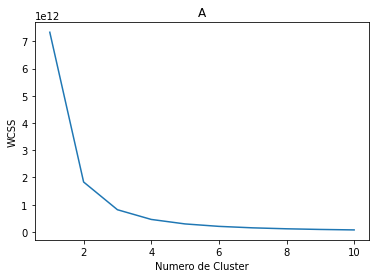

In [36]:
plt.plot(range(1,11), wcss)
plt.title("A")
plt.xlabel("Numero de Cluster")
plt.ylabel("WCSS")
plt.show()

Aplicando el Modelo

In [37]:
clustering = KMeans(n_clusters=9, max_iter=300)
clustering.fit(mergedata_norms)

KMeans(n_clusters=9)

In [38]:
mergedata_norms['Kmeans_Clusters'] = clustering.labels_
mergedata_norms

,level_0,danceability,energy,loudness,mode,valence,tempo,time_signature,Kmeans_Clusters
0,0,0.542,0.659,-7.289,1,0.109,120.122,4,7
1,1,0.727,0.681,-7.114,0,0.448,123.028,4,7
2,2,0.613,0.783,-6.736,1,0.379,117.952,4,7
3,3,0.848,0.821,-5.408,0,0.249,125.051,4,7
4,4,0.754,0.763,-4.627,0,0.464,117.953,4,7
...,...,...,...,...,...,...,...,...,...
44473,44473,0.517,0.768,-7.922,0,0.383,149.928,4,3
44474,44474,0.361,0.821,-3.102,1,0.124,154.935,4,3
44475,44475,0.477,0.921,-4.777,0,0.488,150.042,4,3
44476,44476,0.529,0.945,-5.862,1,0.134,155.047,4,3


Visualizando

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_music = pca.fit_transform(mergedata_norms)
pca_musica_df = pd.DataFrame(data = pca_music, columns=['Componentes_01', 'Componente_02'])
pca_nombres_music = pd.concat([pca_musica_df,mergedata_norms[['Kmeans_Clusters']]],axis=1)
pca_nombres_music


,Componentes_01,Componente_02,Kmeans_Clusters
0,-22237.503946,22.532013,7
1,-22236.503463,19.623700,7
2,-22235.504252,24.692034,7
3,-22234.503000,17.571564,7
4,-22233.504082,24.654029,7
...,...,...,...
44473,22235.500113,-0.082561,3
44474,22236.501302,-5.173276,3
44475,22237.500383,-0.251833,3
44476,22238.501100,-5.235968,3


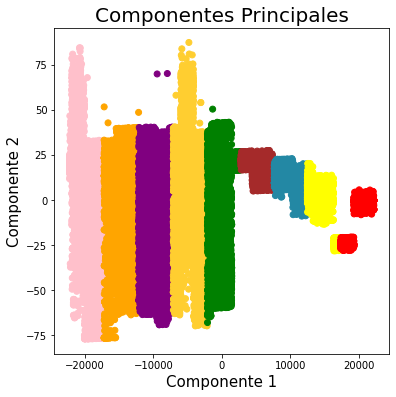

In [40]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20 )

color_theme = np.array(["#FFCE30","#2388A4","orange","red","purple","green","yellow","pink","brown","golden"])
ax.scatter(x = pca_nombres_music.Componentes_01, y = pca_nombres_music.Componente_02,
           c=color_theme[pca_nombres_music.Kmeans_Clusters])
plt.show()


In [41]:
mergedata_outfinal = mergedata_norms.drop(['danceability','energy','loudness','mode','valence','tempo','time_signature', 'level_0'], axis=1)
# # mergedata_outfinal.drop([range(1,2),axis=1)
mergedata_outfinalk = mergedata
mergedata_outfinalk['Kmeans'] = mergedata_outfinal
mergedata_outfinalk



 


,level_0,index,Unnamed: 0,X,danceability,energy,key,loudness,mode,speechiness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,sourcefilename,song_name,Kmeans
0,0,0,1.0,0.0,0.542,0.659,8,-7.289,1,0.0389,...,audio_features,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,7
1,1,1,2.0,1.0,0.727,0.681,5,-7.114,0,0.0265,...,audio_features,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,7
2,2,2,3.0,2.0,0.613,0.783,1,-6.736,1,0.1380,...,audio_features,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,7
3,3,3,4.0,3.0,0.848,0.821,2,-5.408,0,0.0527,...,audio_features,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,7
4,4,4,5.0,4.0,0.754,0.763,7,-4.627,0,0.0435,...,audio_features,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44473,44473,42301,NaN,NaN,0.517,0.768,0,-7.922,0,0.0479,...,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,3
44474,44474,42302,NaN,NaN,0.361,0.821,8,-3.102,1,0.0505,...,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,3
44475,44475,42303,NaN,NaN,0.477,0.921,6,-4.777,0,0.0392,...,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,3
44476,44476,42304,NaN,NaN,0.529,0.945,9,-5.862,1,0.0615,...,audio_features,6MAAMZImxcvYhRnxDLTufD,spotify:track:6MAAMZImxcvYhRnxDLTufD,https://api.spotify.com/v1/tracks/6MAAMZImxcvY...,https://api.spotify.com/v1/audio-analysis/6MAA...,162161,4,https://raw.githubusercontent.com/Benjamilior/...,NaN,3


# Creando la Playlist/Playlist Requerida

In [42]:
mergedata_outfinalk['Kmeans'][2172]
#CAMBIAR EN CASO DE QUE EL DATA FRAME CAMBIE LA CANTIDAD DE DATOS


7

In [43]:
mergedata_finalfinal= mergedata_outfinalk[mergedata_outfinalk['Kmeans']==mergedata_outfinalk['Kmeans'][2172]]
mergedata_finalfinal = mergedata_finalfinal.drop(['level_0','energy','loudness','mode','valence','time_signature','danceability','tempo','sourcefilename','type','index','Unnamed: 0','X','speechiness','acousticness','instrumentalness','liveness','key'], axis=1)
mergedata_finalfinal

,id,uri,track_href,analysis_url,duration_ms,song_name,Kmeans
0,2gpWyfu7eZ01zzncHpxOtA,spotify:track:2gpWyfu7eZ01zzncHpxOtA,https://api.spotify.com/v1/tracks/2gpWyfu7eZ01...,https://api.spotify.com/v1/audio-analysis/2gpW...,234000,NaN,7
1,6OufwUcCqo81guU2jAlDVP,spotify:track:6OufwUcCqo81guU2jAlDVP,https://api.spotify.com/v1/tracks/6OufwUcCqo81...,https://api.spotify.com/v1/audio-analysis/6Ouf...,241970,NaN,7
2,0h5ddpn03JPxD4x4dMf8i0,spotify:track:0h5ddpn03JPxD4x4dMf8i0,https://api.spotify.com/v1/tracks/0h5ddpn03JPx...,https://api.spotify.com/v1/audio-analysis/0h5d...,138308,NaN,7
3,6GomT970rCOkKAyyrwJeZi,spotify:track:6GomT970rCOkKAyyrwJeZi,https://api.spotify.com/v1/tracks/6GomT970rCOk...,https://api.spotify.com/v1/audio-analysis/6Gom...,157445,NaN,7
4,18asYwWugKjjsihZ0YvRxO,spotify:track:18asYwWugKjjsihZ0YvRxO,https://api.spotify.com/v1/tracks/18asYwWugKjj...,https://api.spotify.com/v1/audio-analysis/18as...,164819,NaN,7
...,...,...,...,...,...,...,...
5044,4YTt3uc6TkxLr9mh1DA4jF,spotify:track:4YTt3uc6TkxLr9mh1DA4jF,https://api.spotify.com/v1/tracks/4YTt3uc6TkxL...,https://api.spotify.com/v1/audio-analysis/4YTt...,188657,The Forge,7
5045,5A7qBLBvwycnknR0GTTYsH,spotify:track:5A7qBLBvwycnknR0GTTYsH,https://api.spotify.com/v1/tracks/5A7qBLBvwycn...,https://api.spotify.com/v1/audio-analysis/5A7q...,211593,Eon,7
5046,0Bi3hwxqNfWbrNu5GHy3yU,spotify:track:0Bi3hwxqNfWbrNu5GHy3yU,https://api.spotify.com/v1/tracks/0Bi3hwxqNfWb...,https://api.spotify.com/v1/audio-analysis/0Bi3...,387712,Goliath,7
5047,3Nz8fn71XpfHfT7FkJeVAU,spotify:track:3Nz8fn71XpfHfT7FkJeVAU,https://api.spotify.com/v1/tracks/3Nz8fn71XpfH...,https://api.spotify.com/v1/audio-analysis/3Nz8...,314327,Lost,7
